In [1]:
# Bitcoin-price-prediction-project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\pavit\OneDrive\Documents\Downloads\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")


In [7]:
data.columns = data.columns.str.lower()
data.head()
data.isnull().sum()
data.describe()

,timestamp,open,high,low,close,volume_(btc),volume_(currency),weighted_price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


data.columns = data.columns.str.lower()
#data['year'] = pd.to_datetime(data['timestamp']).dt.year
data['date'] = pd.to_datetime(data['timestamp'], unit='s').dt.strftime('%d-%m-%Y')
data['year'] = data['date'].dt.year

In [10]:
# Convert Unix timestamp to formatted date string
data['date'] = pd.to_datetime(data['timestamp'], unit='s').dt.strftime('%d-%m-%Y')

# Convert formatted date string to datetime object
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%Y')

# Extract year from datetime object
data['year'] = data['date'].dt.year

In [12]:
data = data.drop(columns = ['volume_(btc)', 'volume_(currency)', 'weighted_price', 'timestamp'])
data = data.dropna()

In [18]:
data.head(15)

,open,high,low,close,date,year
0,4.39,4.39,4.39,4.39,2011-12-31,2011
478,4.39,4.39,4.39,4.39,2011-12-31,2011
547,4.50,4.57,4.50,4.57,2011-12-31,2011
548,4.58,4.58,4.58,4.58,2011-12-31,2011
1224,4.58,4.58,4.58,4.58,2012-01-01,2012
1896,4.84,4.84,4.84,4.84,2012-01-01,2012
2333,5.00,5.00,5.00,5.00,2012-01-01,2012
3612,5.00,5.00,5.00,5.00,2012-01-02,2012
4553,5.32,5.32,5.32,5.32,2012-01-03,2012
4710,5.14,5.14,5.14,5.14,2012-01-03,2012


<Axes: xlabel='date'>

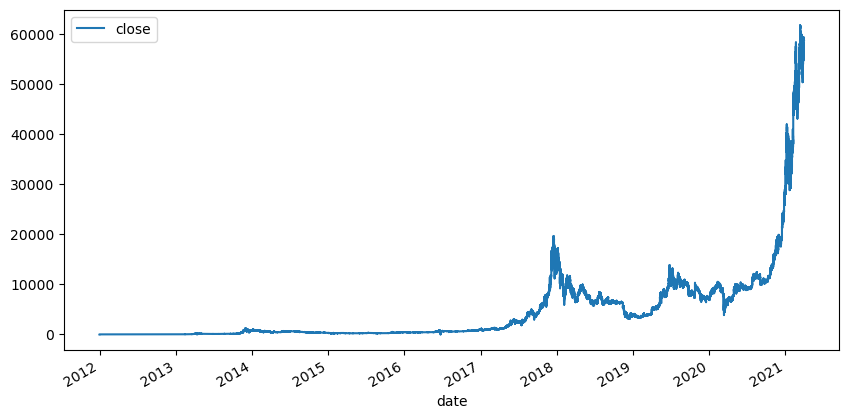

In [8]:
fig, ax = plt.subplots(figsize=(10, 5)) 
data.plot.line(y='close',x='date', ax = ax )

<Axes: xlabel='date'>

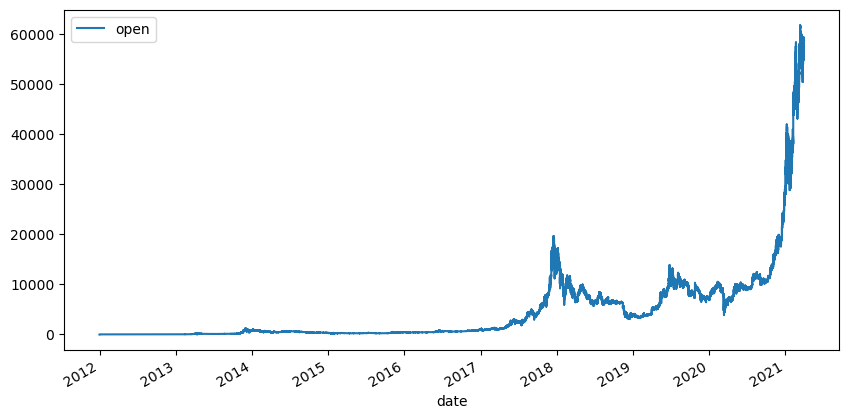

In [9]:
fig, ax = plt.subplots(figsize=(10, 5)) 
data.plot.line(y='open',x='date', ax = ax )

<Axes: xlabel='date'>

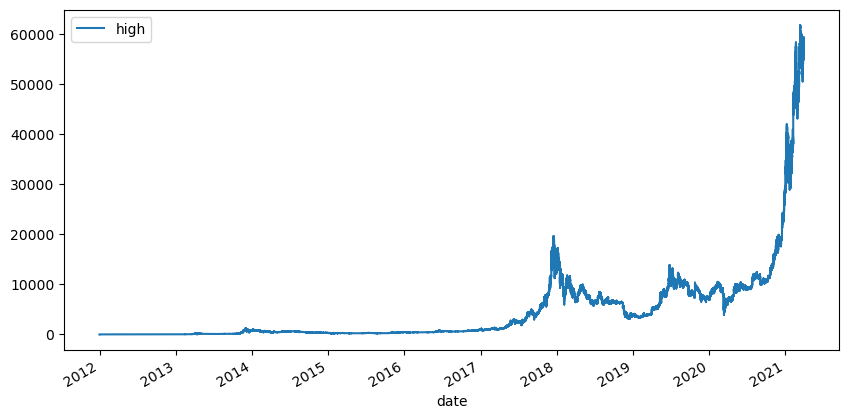

In [10]:
fig, ax = plt.subplots(figsize=(10, 5)) 
data.plot.line(y='high',x='date', ax = ax )

<Axes: xlabel='date'>

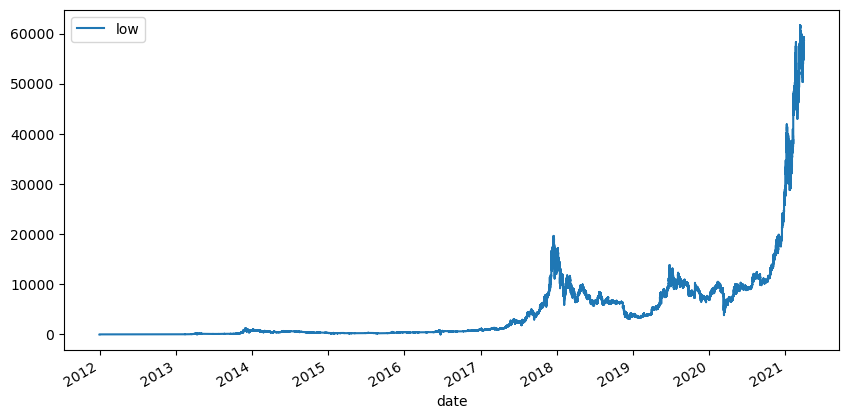

In [11]:
fig, ax = plt.subplots(figsize=(10, 5)) 
data.plot.line(y='low',x='date', ax = ax )

checking target

In [13]:
data['open-close']  = data['open'] - data['close']
data['low-high']  = data['low'] - data['high']
data['target'] = np.where(data['close'].shift(-1) >data['close'], 1, 0)

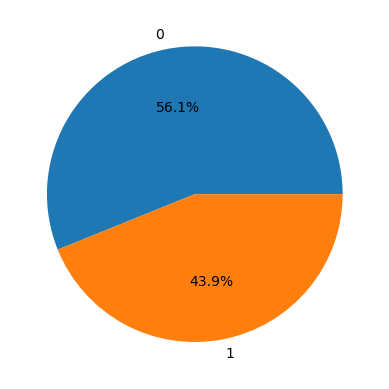

In [14]:
#checcking if the target is balanced or not
plt.pie(data['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

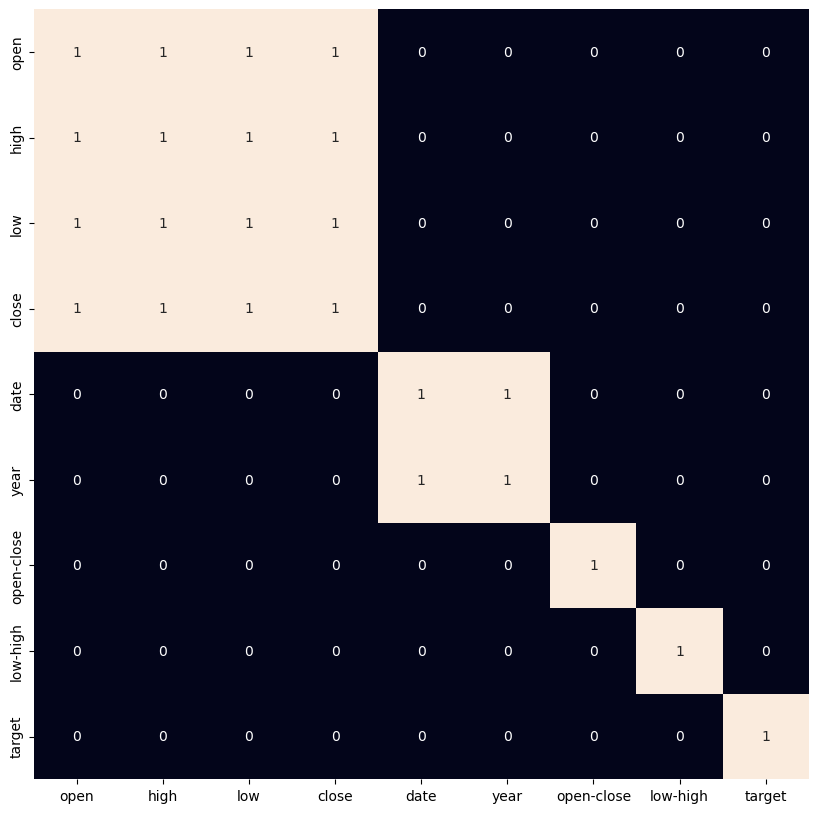

In [15]:
#checking for correlated features
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [16]:
averages = data.groupby('year').agg({
    'open': 'mean',
    'high': 'mean',
    'low': 'mean',
    'close': 'mean'
})
print(averages)

              open          high           low         close
year                                                        
2011      4.465000      4.482500      4.465000      4.482500
2012     10.094570     10.097488     10.091053     10.093934
2013    254.281420    254.658978    253.855315    254.264327
2014    527.132511    527.571308    526.679647    527.137609
2015    274.366745    274.509271    274.208588    274.364343
2016    558.906222    559.088461    558.701291    558.905550
2017   4155.221695   4159.353798   4150.157998   4155.146585
2018   7576.803839   7582.514112   7570.686577   7576.778120
2019   7427.136604   7431.551337   7422.596721   7426.850617
2020  11101.659803  11107.750772  11095.796427  11101.816959
2021  44898.235952  44936.955409  44858.779264  44898.869424


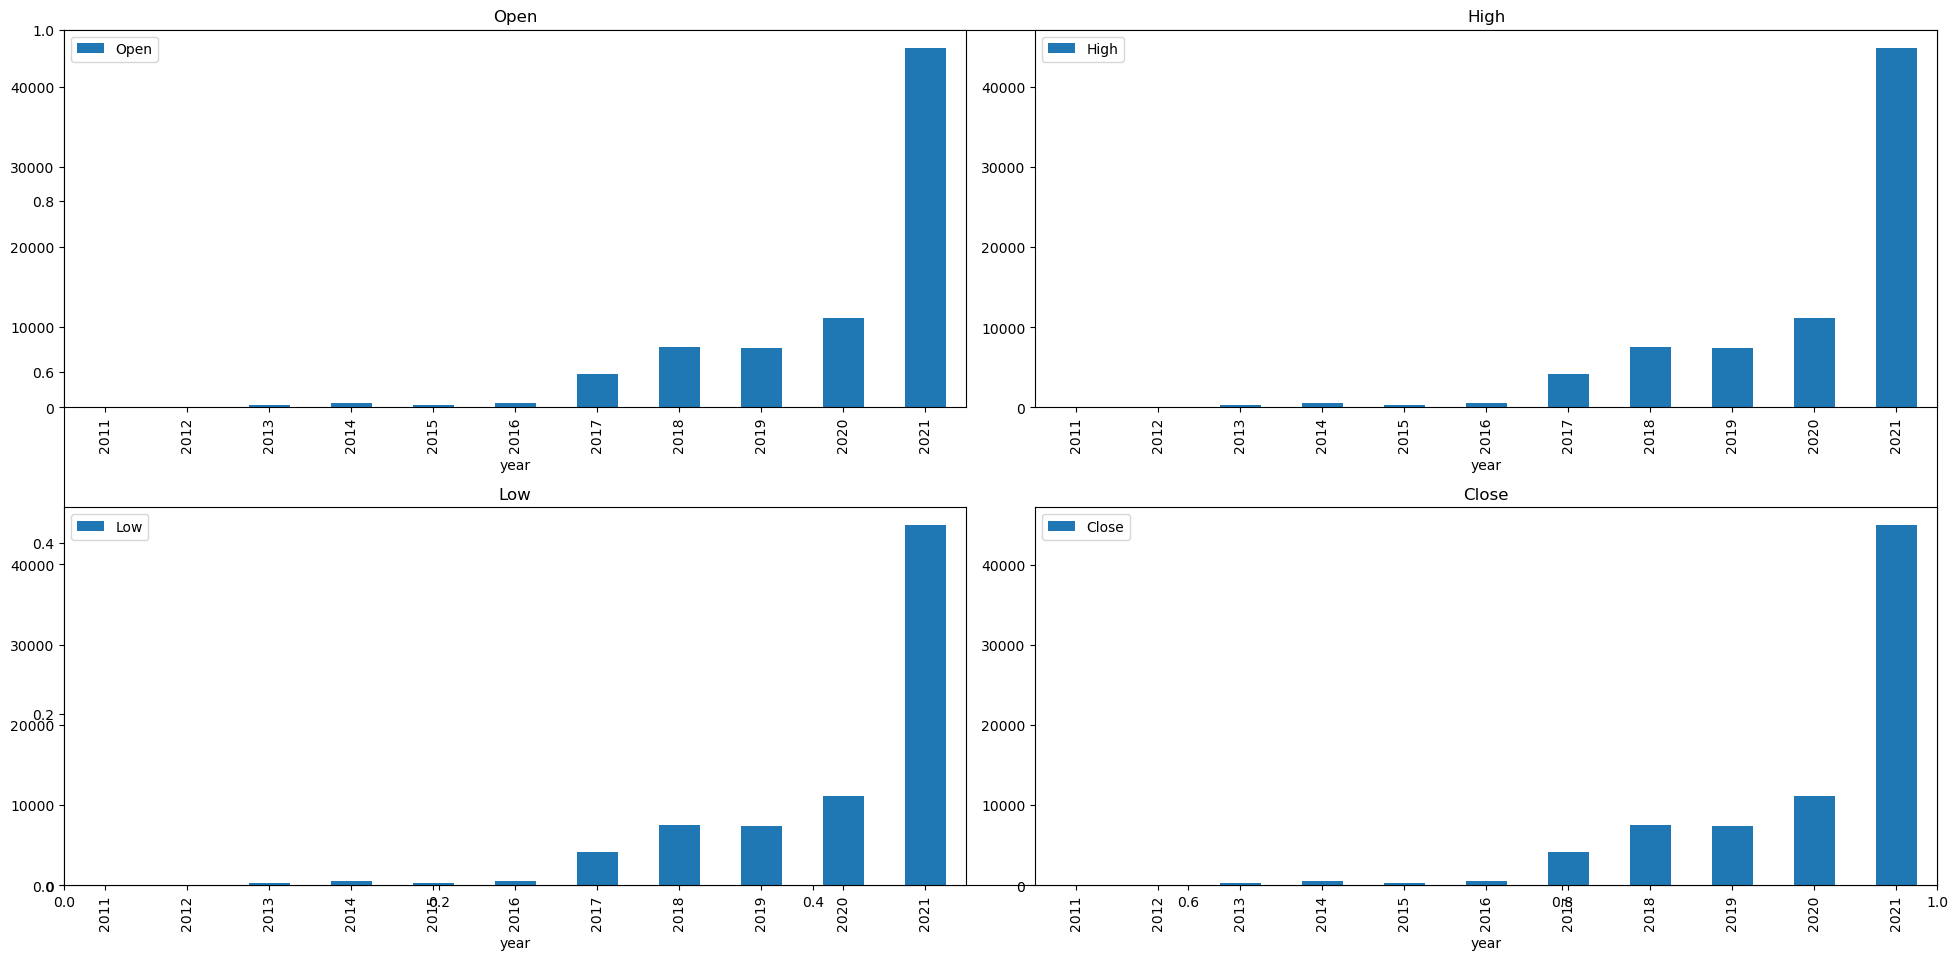

In [17]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2,2,i+1)
    averages[col].plot.bar()
    plt.title(col.capitalize())
    plt.legend([col.capitalize()])

plt.tight_layout()    
plt.show()
    

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [19]:
data.head()

,open,high,low,close,date,year,open-close,low-high,target
0,4.39,4.39,4.39,4.39,2011-12-31,2011,0.00,0.00,0
478,4.39,4.39,4.39,4.39,2011-12-31,2011,0.00,0.00,1
547,4.50,4.57,4.50,4.57,2011-12-31,2011,-0.07,-0.07,1
548,4.58,4.58,4.58,4.58,2011-12-31,2011,0.00,0.00,0
1224,4.58,4.58,4.58,4.58,2012-01-01,2012,0.00,0.00,1


In [20]:
factors = data[['open-close', 'low-high']]
target = data['target']
scaler = StandardScaler()
data_new = scaler.fit_transform(factors)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    factors, target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(2891015, 2) (722754, 2)


logistic regression, SVM classifier, XGB classifier
classification metrics


In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

# Load sample dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = [
    LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200),  # Multi-class adjustment for logistic regression
    SVC(kernel='poly', probability=True, verbose=True),
    XGBClassifier(verbosity=1)
]

# Training and evaluating models
for i in range(len(models)):
    print(f'Training model: {models[i]}')
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train), multi_class='ovr'))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_test, models[i].predict_proba(X_test), multi_class='ovr'))
    print()


Training model: LogisticRegression(max_iter=200)
LogisticRegression(max_iter=200) : 
Training Accuracy :  0.9981241205899023
Validation Accuracy :  1.0

Training model: SVC(kernel='poly', probability=True, verbose=True)
[LibSVM]SVC(kernel='poly', probability=True, verbose=True) : 
Training Accuracy :  0.998957844772168
Validation Accuracy :  1.0

Training model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
      

print('check 0')
from xgboost import XGBClassifier
print('check 1')
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
print('check 2')

for i in range(0,3):
    models[i].fit(X_train, Y_train)
    training_accuracy = metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1])
    print('working on validation accuracy..')
    validation_accuracy = metrics.roc_auc_score(Y_test, models[i].predict_proba(X_test)[:,1])
    print(f'{models[i]} : ')
    print('Training Accuracy : ',training_accuracy)
    print('Validation Accuracy : ',validation_accuracy)
    print()